In [1]:
import pandas as pd
import seaborn as sns

In [2]:
gameSales = pd.read_csv('../Datasets/vgsales.csv', sep=',')

In [3]:
gameSales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Do you expect there to be a correlation between the two columns?
Yes, some genres of games were more popular a decade age than now.

In [4]:
gameSales['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [5]:
def create_contingency_table(dataset, column1, column2, excluded_genres, min_year, max_year):
    filtered_dataset = dataset[~dataset[column1].isin(excluded_genres) & (dataset[column2] >= min_year) & (dataset[column2] <= max_year)]
    return filtered_dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

In [6]:
excluded_genres = ['Racing', 'Puzzle', 'Simulation', 'Strategy', 'Platform', 'Fighting', 'Adventure']
min_year = 2000
max_year = 2016
gameContingencyTable = create_contingency_table(gameSales, 'Genre','Year', excluded_genres, min_year, max_year)
gameContingencyTable


Genre,Action,Misc,Role-Playing,Shooter,Sports
Year,,,,,
2000.0,44,20,29,20,81
2001.0,67,26,41,36,96
2002.0,125,45,55,79,188
2003.0,144,53,48,73,125
2004.0,125,85,60,88,106
2005.0,192,115,71,96,122
2006.0,184,109,110,69,138
2007.0,211,151,103,85,167
2008.0,221,212,112,83,200


# Do you observer different ratios between categories here?
Yes, the amount of genres greatly differs per year.

<AxesSubplot:xlabel='Year'>

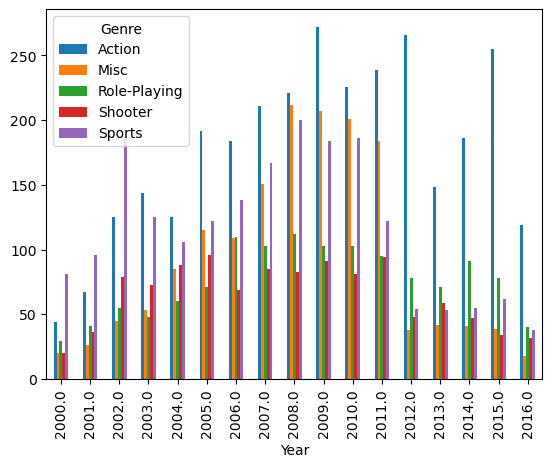

In [7]:
gameContingencyTable.plot(kind='bar')

# Do you observer different ratios between categories here?
Yes, the amount of genres greatly differs per year.

In [8]:
excluded_genres = ['Racing', 'Puzzle', 'Simulation', 'Strategy', 'Platform', 'Fighting', 'Adventure']
min_year = 2000
max_year = 2016
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2, excluded_genres, min_year, max_year)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [9]:
check_cat_vs_cat_correlation(gameSales, 'Genre','Year')

The odds of a correlation between Genre and Year is 100.0% (Based on a p value of 1.064056649725451e-121).
This percentage needs to be at least 95% for a significant correlation.
